In [1]:
from lenslikelihood.power_spectra import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15

structure_formation_interp_As = StructureFormationInterpLinearc8Prior(ns_values, ar_values, ar2_values, 'As')
structure_formation_interp_As_highfit = StructureFormationInterpLinearc8Prior(ns_values, ar_values, ar2_values, 'As', 
                                                                      mass_min=9e7, mass_max=9e9)
structure_formation_interp_As_lowfit = StructureFormationInterpLinearc8Prior(ns_values, ar_values, ar2_values, 'As', 
                                                                      mass_min=1e6, mass_max=2e8)

z_eval = 1.
structure_formation_interp_As_z1 = StructureFormationInterpLinearc8Prior(ns_values, ar_values, ar2_values, 'As', z=z_eval)
structure_formation_interp_As_highfit_z1 = StructureFormationInterpLinearc8Prior(ns_values, ar_values, ar2_values, 'As', 
                                                                      mass_min=9e7, mass_max=9e9, z=z_eval)
structure_formation_interp_As_lowfit_z1 = StructureFormationInterpLinearc8Prior(ns_values, ar_values, ar2_values, 'As', 
                                                                      mass_min=1e6, mass_max=2e8, z=z_eval)

### Assess systematic errors in the logarithmic slope parameters ($\beta$ and $\Delta \alpha$) by fitting the $\vec{q}_L$ model in different mass ranges

#### First, examine the effect on $\beta$

In [2]:
ns, ar, ar2 = 0.9645, 0.06, 0.005
_, beta, _, delta_alpha = structure_formation_interp_As(ns, ar, ar2)
_, beta_highfit, c8, delta_alpha_highfit = structure_formation_interp_As_highfit(ns, ar, ar2)
_, beta_lowfit, _, delta_alpha_lowfit = structure_formation_interp_As_lowfit(ns, ar, ar2)

print('Positive a_run and b_run: ')
print('Fit between 10^6 and 2*10^8: ', beta_lowfit)
print('Fit between 10^7 and 10^9: ', beta)
print('Fit between 9*10^7 and 9*10^9: ', beta_highfit)
print('relative error (low fit, high fit): ', beta_lowfit/beta - 1,beta_highfit/beta - 1)
print('corresponding c8 value: ', c8)
print('\n')

ns, ar, ar2 = 0.9645, -0.06, -0.01
_, beta, _, delta_alpha = structure_formation_interp_As(ns, ar, ar2)
_, beta_highfit, c8, delta_alpha_highfit = structure_formation_interp_As_highfit(ns, ar, ar2)
_, beta_lowfit, _, delta_alpha_lowfit = structure_formation_interp_As_lowfit(ns, ar, ar2)
print('Negative a_run and b_run: ')
print('Fit between 10^6 and 2*10^8: ', beta_lowfit)
print('Fit between 10^7 and 10^9: ', beta)
print('Fit between 9*10^7 and 9*10^9: ', beta_highfit)
print('relative error (low fit, high fit): ', beta_lowfit/beta - 1,beta_highfit/beta - 1)
print('corresponding c8 value: ', c8)
print('\n')

ns, ar, ar2 = 0.9645, -0.06, 0.005
_, beta, _, delta_alpha = structure_formation_interp_As(ns, ar, ar2)
_, beta_highfit, c8, delta_alpha_highfit = structure_formation_interp_As_highfit(ns, ar, ar2)
_, beta_lowfit, _, delta_alpha_lowfit = structure_formation_interp_As_lowfit(ns, ar, ar2)
print('Negative a_run and positive b_run: ')
print('Fit between 10^6 and 2*10^8: ', beta_lowfit)
print('Fit between 10^7 and 10^9: ', beta)
print('Fit between 9*10^7 and 9*10^9: ', beta_highfit)
print('relative error (low fit, high fit): ', beta_lowfit/beta - 1,beta_highfit/beta - 1)
print('corresponding c8 value: ', c8)
print('\n')

ns, ar, ar2 = 0.9645, 0.06, -0.005
_, beta, _, delta_alpha = structure_formation_interp_As(ns, ar, ar2)
_, beta_highfit, c8, delta_alpha_highfit = structure_formation_interp_As_highfit(ns, ar, ar2)
_, beta_lowfit, _, delta_alpha_lowfit = structure_formation_interp_As_lowfit(ns, ar, ar2)
print('Positive a_run and negative b_run: ')
print('Fit between 10^6 and 2*10^8: ', beta_lowfit)
print('Fit between 10^7 and 10^9: ', beta)
print('Fit between 9*10^7 and 9*10^9: ', beta_highfit)
print('relative error (low fit, high fit): ', beta_lowfit/beta - 1,beta_highfit/beta - 1)
print('corresponding c8 value: ', c8)
print('\n')

Positive a_run and b_run: 
Fit between 10^6 and 2*10^8:  5.526390625000017
Fit between 10^7 and 10^9:  4.461343750000013
Fit between 9*10^7 and 9*10^9:  3.827187500000011
relative error (low fit, high fit):  0.2387278216344575 -0.1421446733397308
corresponding c8 value:  289.1991270211424


Negative a_run and b_run: 
Fit between 10^6 and 2*10^8:  -0.03728906249999838
Fit between 10^7 and 10^9:  -0.07412499999999832
Fit between 9*10^7 and 9*10^9:  -0.11714843749999825
relative error (low fit, high fit):  -0.49694350758854333 0.5804173693086125
corresponding c8 value:  3.6795960770737746


Negative a_run and positive b_run: 
Fit between 10^6 and 2*10^8:  0.6260781250000006
Fit between 10^7 and 10^9:  0.5489453125000007
Fit between 9*10^7 and 9*10^9:  0.5136250000000008
relative error (low fit, high fit):  0.14051092293460443 -0.06434213335230887
corresponding c8 value:  10.09277297556233


Positive a_run and negative b_run: 
Fit between 10^6 and 2*10^8:  0.9120312500000005
Fit between 10

#### Next, examine the effect on $\Delta \alpha$

In [3]:
ns, ar, ar2 = 0.9645, 0.06, 0.005
dlos, beta, _, delta_alpha = structure_formation_interp_As(ns, ar, ar2)
dlos, beta_highfit, c8, delta_alpha_highfit = structure_formation_interp_As_highfit(ns, ar, ar2)
dlos, beta_lowfit, _, delta_alpha_lowfit = structure_formation_interp_As_lowfit(ns, ar, ar2)

print('Positive a_run and b_run: ')
print('Fit between 10^6 and 2*10^8: ', delta_alpha_lowfit)
print('Fit between 10^7 and 10^9: ', delta_alpha)
print('Fit between 9*10^7 and 9*10^9: ', delta_alpha_highfit)
print('relative error (low fit, high fit): ', delta_alpha - delta_alpha_lowfit, delta_alpha - delta_alpha_highfit)
print('corresponding delta_LOS value: ', dlos)
print('\n')

ns, ar, ar2 = 0.9645, -0.06, -0.01
dlos, beta, _, delta_alpha = structure_formation_interp_As(ns, ar, ar2)
dlos, beta_highfit, c8, delta_alpha_highfit = structure_formation_interp_As_highfit(ns, ar, ar2)
dlos, beta_lowfit, _, delta_alpha_lowfit = structure_formation_interp_As_lowfit(ns, ar, ar2)
print('Positive a_run and b_run: ')
print('Fit between 10^6 and 2*10^8: ', delta_alpha_lowfit)
print('Fit between 10^7 and 10^9: ', delta_alpha)
print('Fit between 9*10^7 and 9*10^9: ', delta_alpha_highfit)
print('relative error (low fit, high fit): ', delta_alpha - delta_alpha_lowfit, delta_alpha - delta_alpha_highfit)
print('corresponding delta_LOS value: ', dlos)
print('\n')

ns, ar, ar2 = 0.9645, -0.06, 0.005
dlos, beta, _, delta_alpha = structure_formation_interp_As(ns, ar, ar2)
dlos, beta_highfit, c8, delta_alpha_highfit = structure_formation_interp_As_highfit(ns, ar, ar2)
dlos, beta_lowfit, _, delta_alpha_lowfit = structure_formation_interp_As_lowfit(ns, ar, ar2)
print('Positive a_run and b_run: ')
print('Fit between 10^6 and 2*10^8: ', delta_alpha_lowfit)
print('Fit between 10^7 and 10^9: ', delta_alpha)
print('Fit between 9*10^7 and 9*10^9: ', delta_alpha_highfit)
print('relative error (low fit, high fit): ', delta_alpha - delta_alpha_lowfit, delta_alpha - delta_alpha_highfit)
print('corresponding delta_LOS value: ', dlos)
print('\n')

ns, ar, ar2 = 0.9645, 0.06, -0.005
dlos, beta, _, delta_alpha = structure_formation_interp_As(ns, ar, ar2)
dlos, beta_highfit, c8, delta_alpha_highfit = structure_formation_interp_As_highfit(ns, ar, ar2)
dlos, beta_lowfit, _, delta_alpha_lowfit = structure_formation_interp_As_lowfit(ns, ar, ar2)
print('Positive a_run and b_run: ')
print('Fit between 10^6 and 2*10^8: ', delta_alpha_lowfit)
print('Fit between 10^7 and 10^9: ', delta_alpha)
print('Fit between 9*10^7 and 9*10^9: ', delta_alpha_highfit)
print('relative error (low fit, high fit): ', delta_alpha - delta_alpha_lowfit, delta_alpha - delta_alpha_highfit)
print('corresponding delta_LOS value: ', dlos)
print('\n')

Positive a_run and b_run: 
Fit between 10^6 and 2*10^8:  -0.012770313964355235
Fit between 10^7 and 10^9:  -0.02362258755213939
Fit between 9*10^7 and 9*10^9:  -0.031448695233456364
relative error (low fit, high fit):  -0.010852273587784156 0.007826107681316974
corresponding delta_LOS value:  1.7193317872629135


Positive a_run and b_run: 
Fit between 10^6 and 2*10^8:  0.3826019691129305
Fit between 10^7 and 10^9:  0.31283454055197235
Fit between 9*10^7 and 9*10^9:  0.23701328101677593
relative error (low fit, high fit):  -0.06976742856095813 0.07582125953519642
corresponding delta_LOS value:  0.13859840922177546


Positive a_run and b_run: 
Fit between 10^6 and 2*10^8:  -0.015538960497734757
Fit between 10^7 and 10^9:  -0.006270730101574998
Fit between 9*10^7 and 9*10^9:  0.0009529380738150218
relative error (low fit, high fit):  0.00926823039615976 -0.007223668175390019
corresponding delta_LOS value:  0.8286796362059468


Positive a_run and b_run: 
Fit between 10^6 and 2*10^8:  0.019

### Now on $c_8$

In [4]:
ar, ar2 = 0.1, 0.0075
_, _, c0_reference, _ = structure_formation_interp_As_highfit(ns, 0., 0.)
_, _, c0, _ = structure_formation_interp_As_highfit_z1(ns, 0., 0.)
evolution_LCDM = c0 / c0_reference
_, _, c0_reference, _ = structure_formation_interp_As_highfit(ns, ar, ar2)
_, _, c0, _ = structure_formation_interp_As_highfit_z1(ns, ar, ar2)
evolution = c0 / c0_reference
print('LCDM ratio: ', evolution_LCDM)
print('model ratio: ', evolution)
r = evolution_LCDM / evolution - 1
print('relative uncertaintiy: ', evolution_LCDM / evolution - 1)
print('absolute error: ', r * c0_reference)
print('\n')

ar, ar2 = -0.1, -0.0075
_, _, c0_reference, _ = structure_formation_interp_As_highfit(ns, 0., 0.)
_, _, c0, _ = structure_formation_interp_As_highfit_z1(ns, 0., 0.)
evolution_LCDM = c0 / c0_reference
_, _, c0_reference, _ = structure_formation_interp_As_highfit(ns, ar, ar2)
_, _, c0, _ = structure_formation_interp_As_highfit_z1(ns, ar, ar2)
evolution = c0 / c0_reference
print('LCDM ratio: ', evolution_LCDM)
print('model ratio: ', evolution)
r = evolution_LCDM / evolution - 1
print('relative uncertaintiy: ', evolution_LCDM / evolution - 1)
print('absolute error: ', r * c0_reference)
print('\n')

ar, ar2 = -0.1, 0.0075
_, _, c0_reference, _ = structure_formation_interp_As_highfit(ns, 0., 0.)
_, _, c0, _ = structure_formation_interp_As_highfit_z1(ns, 0., 0.)
evolution_LCDM = c0 / c0_reference
_, _, c0_reference, _ = structure_formation_interp_As_highfit(ns, ar, ar2)
_, _, c0, _ = structure_formation_interp_As_highfit_z1(ns, ar, ar2)
evolution = c0 / c0_reference
print('LCDM ratio: ', evolution_LCDM)
print('model ratio: ', evolution)
r = evolution_LCDM / evolution - 1
print('relative uncertaintiy: ', evolution_LCDM / evolution - 1)
print('absolute error: ', r * c0_reference)
print('\n')

ar, ar2 = 0.1, -0.0075
_, _, c0_reference, _ = structure_formation_interp_As_highfit(ns, 0., 0.)
_, _, c0, _ = structure_formation_interp_As_highfit_z1(ns, 0., 0.)
evolution_LCDM = c0 / c0_reference
_, _, c0_reference, _ = structure_formation_interp_As_highfit(ns, ar, ar2)
_, _, c0, _ = structure_formation_interp_As_highfit_z1(ns, ar, ar2)
evolution = c0 / c0_reference
print('LCDM ratio: ', evolution_LCDM)
print('model ratio: ', evolution)
r = evolution_LCDM / evolution - 1
print('relative uncertaintiy: ', evolution_LCDM / evolution - 1)
print('absolute error: ', r * c0_reference)
print('\n')

LCDM ratio:  0.5952989241448239
model ratio:  0.5954512762816991
relative uncertaintiy:  -0.0002558599552033858
absolute error:  -5.01267489706563


LCDM ratio:  0.5952989241448239
model ratio:  0.729123166782602
relative uncertaintiy:  -0.1835413394259624
absolute error:  -0.5753218187295466


LCDM ratio:  0.5952989241448239
model ratio:  0.6228022058705458
relative uncertaintiy:  -0.04416054000206715
absolute error:  -0.28190992863123293


LCDM ratio:  0.5952989241448239
model ratio:  0.6019366957134652
relative uncertaintiy:  -0.011027358218747008
absolute error:  -0.704885788434593




### Now look at systematic errors as a function of arun and brun

In [5]:
ns, ar2 = 0.9645, 0.0035

n = 50
ar2values = np.linspace(-0.01, 0.01, n)
arvalues = np.linspace(-0.1, 0.1, n)

values_low_beta = np.empty((n, n))
values_low_alpha = np.empty((n, n))
values_high_beta = np.empty((n, n))
values_high_alpha = np.empty((n, n))
values_c8 = np.empty((n, n))
values_dlos = np.empty((n, n))

for i, ar in enumerate(arvalues):
    for j, ar2 in enumerate(ar2values):
        
        _, beta, _, delta_alpha = structure_formation_interp_As(ns, ar, ar2)
        _, beta_highfit, c8, delta_alpha_highfit = structure_formation_interp_As_highfit(ns, ar, ar2)
        _, beta_lowfit, _, delta_alpha_lowfit = structure_formation_interp_As_lowfit(ns, ar, ar2)
        
        values_low_beta[i, j] = (beta - beta_lowfit) 
        values_high_beta[i, j] = (beta - beta_highfit) 
        values_low_alpha[i, j] = (delta_alpha - delta_alpha_lowfit) 
        values_high_alpha[i, j] = (delta_alpha - delta_alpha_highfit) 
        
        dlos_reference_base, _, c0_reference_base, _ = structure_formation_interp_As_highfit(ns, 0., 0.)
        dlos_high_base, _, c0_high_base, _ = structure_formation_interp_As_highfit_z1(ns, 0., 0.)
        evolution_LCDM_c8 = c0_high_base / c0_reference_base
        evolution_LCDM_dlos = dlos_high_base / dlos_reference_base
        
        dlos_reference, _, c0_reference, _ = structure_formation_interp_As_highfit(ns, ar, ar2)
        dlos_high, _, c0_high, _ = structure_formation_interp_As_highfit_z1(ns, ar, ar2)
        evolution_c8 = c0_high / c0_reference
        evolution_dlos = dlos_high / dlos_reference
        
        ratio_c8 = evolution_LCDM_c8 / evolution_c8 - 1
        ratio_dlos = evolution_LCDM_dlos / evolution_dlos - 1
        
        new_c8 = c0_reference_base * (1 + ratio_c8)
        delta_log10c8 = np.log10(new_c8) - np.log10(c0_reference_base)
        
        new_dlos = dlos_reference_base * (1 + ratio_dlos)
        delta_dlos = new_dlos - dlos_reference_base
        
        values_c8[i, j] = delta_log10c8
        values_dlos[i, j] = delta_dlos
        
values_low = np.stack((values_dlos, values_low_beta, values_c8, values_low_alpha), axis=-1)
values_high = np.stack((values_dlos, values_high_beta, values_c8, values_high_alpha), axis=-1)
points = (arvalues, ar2values)

interpolate_systematic_low = RegularGridInterpolator(points, values_low)
interpolate_systematic_high = RegularGridInterpolator(points, values_high)

f = open('systematic_error_interpolation_lowfit', 'wb')
pickle.dump(interpolate_systematic_low, f)
f.close()

f = open('systematic_error_interpolation_highfit', 'wb')
pickle.dump(interpolate_systematic_high, f)
f.close()

### Now visualize the systematic uncertainties

##### First: $\delta_{\rm{LOS}}$

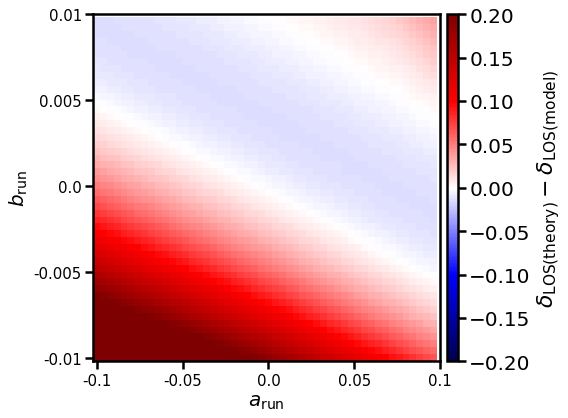

In [6]:
fig = plt.figure(1)
fig.set_size_inches(8, 8)
ax1 = plt.subplot(111)

extent = [arvalues[0], arvalues[-1], ar2values[0], ar2values[-1]]
aspect = (extent[1] - extent[0]) / (extent[3] - extent[2])

xticks = np.linspace(0, n, 5)
xticklabels = np.round(np.linspace(arvalues[0], arvalues[-1], 5), 2)
yticks = np.linspace(0, n, 5)
yticklabels = np.round(np.linspace(ar2values[0], ar2values[-1], 5), 4)

vminmax = 0.2
im = ax1.imshow(values_dlos, origin='lower', cmap='seismic', vmin=-vminmax, vmax=vminmax)

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.1)
cb = plt.colorbar(im, cax=cax, orientation='vertical')
cb.set_label(r'$\delta_{\rm{LOS(theory)}} - \delta_{\rm{LOS(model)}}$', fontsize=22)
cb.ax.tick_params(labelsize=20) 

ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels)
ax1.set_xlabel(r'$a_{\rm{run}}$', fontsize=20)
ax1.set_ylabel(r'$b_{\rm{run}}$', fontsize=20)

plt.tight_layout()
plt.savefig('./figures/systematic_dlos.pdf')

##### Second: $\beta$

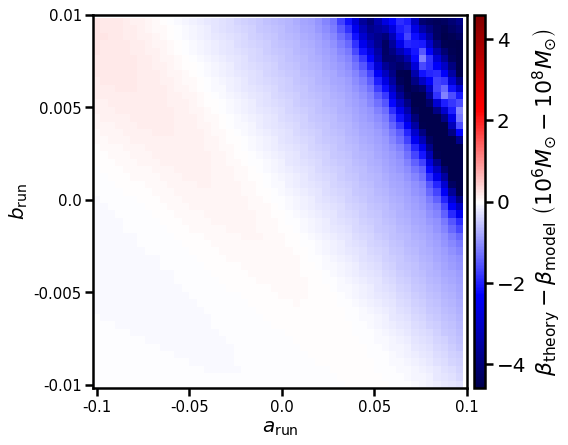

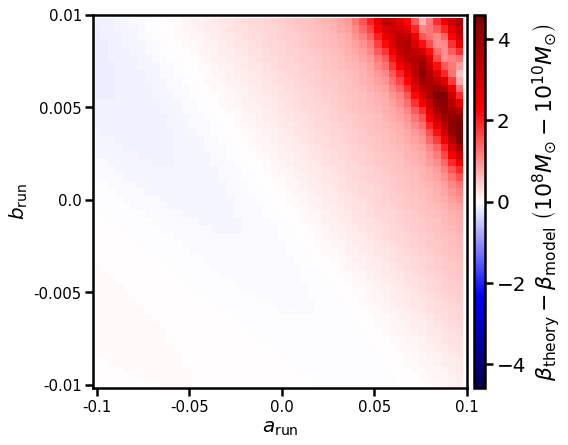

In [7]:
fig = plt.figure(1)
fig.set_size_inches(8, 8)
ax1 = plt.subplot(111)

extent = [arvalues[0], arvalues[-1], ar2values[0], ar2values[-1]]
aspect = (extent[1] - extent[0]) / (extent[3] - extent[2])

xticks = np.linspace(0, n, 5)
xticklabels = np.round(np.linspace(arvalues[0], arvalues[-1], 5), 2)
yticks = np.linspace(0, n, 5)
yticklabels = np.round(np.linspace(ar2values[0], ar2values[-1], 5), 4)

vminmax = 4.6
im = ax1.imshow(values_low_beta, origin='lower', cmap='seismic', vmin=-vminmax, vmax=vminmax)

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.1)
cb = plt.colorbar(im, cax=cax, orientation='vertical')
cb.set_label(r'$\beta_{\rm{theory}} - \beta_{\rm{model}} \ \left(10^6 M_{\odot} - 10^8 M_{\odot}\right)$', fontsize=22)
cb.ax.tick_params(labelsize=20) 

ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels)
ax1.set_xlabel(r'$a_{\rm{run}}$', fontsize=20)
ax1.set_ylabel(r'$b_{\rm{run}}$', fontsize=20)
plt.tight_layout()
plt.savefig('./figures/systematic_beta_low.pdf')

fig = plt.figure(2)
fig.set_size_inches(8, 8)
ax1 = plt.subplot(111)

extent = [arvalues[0], arvalues[-1], ar2values[0], ar2values[-1]]
aspect = (extent[1] - extent[0]) / (extent[3] - extent[2])

xticks = np.linspace(0, n, 5)
xticklabels = np.round(np.linspace(arvalues[0], arvalues[-1], 5), 2)
yticks = np.linspace(0, n, 5)
yticklabels = np.round(np.linspace(ar2values[0], ar2values[-1], 5), 4)

vminmax = 4.6
im = ax1.imshow(values_high_beta, origin='lower', cmap='seismic', vmin=-vminmax, vmax=vminmax)

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.1)
cb = plt.colorbar(im, cax=cax, orientation='vertical')
cb.set_label(r'$\beta_{\rm{theory}} - \beta_{\rm{model}} \ \left(10^8 M_{\odot} - 10^{10} M_{\odot}\right)$', fontsize=22)
cb.ax.tick_params(labelsize=20) 

ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels)
ax1.set_xlabel(r'$a_{\rm{run}}$', fontsize=20)
ax1.set_ylabel(r'$b_{\rm{run}}$', fontsize=20)
plt.tight_layout()
plt.savefig('./figures/systematic_beta_high.pdf')

##### Third: $\log_{10} c_8$

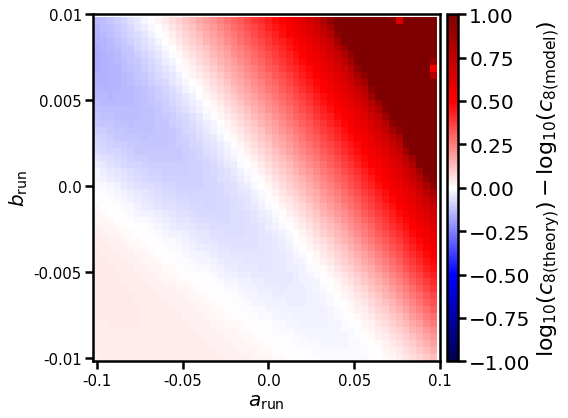

In [8]:
fig = plt.figure(1)
fig.set_size_inches(8, 8)
ax1 = plt.subplot(111)

extent = [arvalues[0], arvalues[-1], ar2values[0], ar2values[-1]]
aspect = (extent[1] - extent[0]) / (extent[3] - extent[2])

xticks = np.linspace(0, n, 5)
xticklabels = np.round(np.linspace(arvalues[0], arvalues[-1], 5), 2)
yticks = np.linspace(0, n, 5)
yticklabels = np.round(np.linspace(ar2values[0], ar2values[-1], 5), 4)

vminmax = 1.
im = ax1.imshow(values_high_beta, origin='lower', cmap='seismic', vmin=-vminmax, vmax=vminmax)

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.1)
cb = plt.colorbar(im, cax=cax, orientation='vertical')
cb.set_label(r'$\log_{10}\left(c_{8(\rm{theory})}\right) - \log_{10}\left(c_{8(\rm{model})}\right) $', fontsize=22)
cb.ax.tick_params(labelsize=20) 

ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels)
ax1.set_xlabel(r'$a_{\rm{run}}$', fontsize=20)
ax1.set_ylabel(r'$b_{\rm{run}}$', fontsize=20)

plt.tight_layout()
plt.savefig('./figures/systematic_c8.pdf')

#### Fourth: $\Delta \alpha$

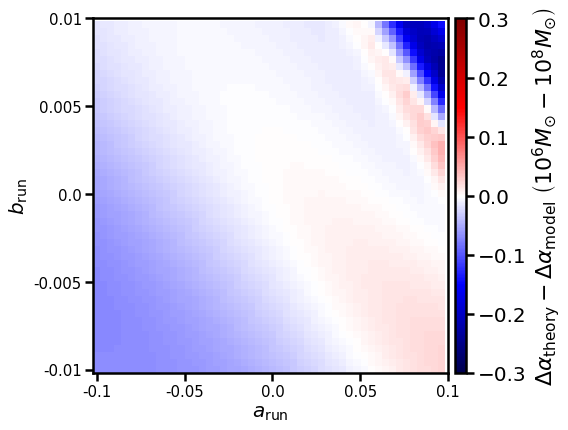

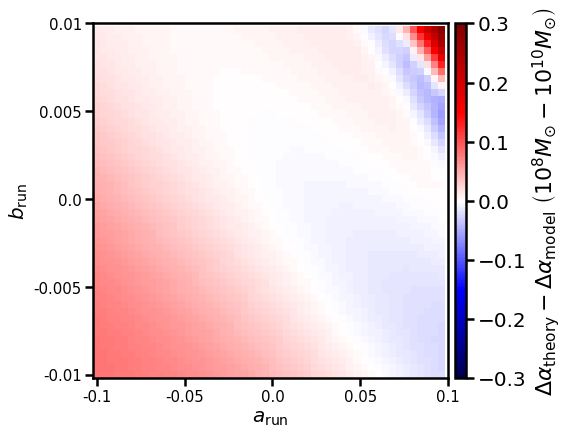

In [9]:
fig = plt.figure(1)
fig.set_size_inches(8, 8)
ax1 = plt.subplot(111)

extent = [arvalues[0], arvalues[-1], ar2values[0], ar2values[-1]]
aspect = (extent[1] - extent[0]) / (extent[3] - extent[2])

xticks = np.linspace(0, n, 5)
xticklabels = np.round(np.linspace(arvalues[0], arvalues[-1], 5), 2)
yticks = np.linspace(0, n, 5)
yticklabels = np.round(np.linspace(ar2values[0], ar2values[-1], 5), 4)

vminmax = 0.3
im = ax1.imshow(values_low_alpha, origin='lower', cmap='seismic', vmin=-vminmax, vmax=vminmax)

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.1)
cb = plt.colorbar(im, cax=cax, orientation='vertical')
cb.set_label(r'$\Delta \alpha_{\rm{theory}} - \Delta \alpha_{\rm{model}} \ \left(10^6 M_{\odot} - 10^8 M_{\odot}\right)$', fontsize=22)
cb.ax.tick_params(labelsize=20) 

ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels)
ax1.set_xlabel(r'$a_{\rm{run}}$', fontsize=20)
ax1.set_ylabel(r'$b_{\rm{run}}$', fontsize=20)

plt.tight_layout()
plt.savefig('./figures/systematic_deltaalpha_low.pdf')

fig = plt.figure(2)
fig.set_size_inches(8, 8)
ax1 = plt.subplot(111)

extent = [arvalues[0], arvalues[-1], ar2values[0], ar2values[-1]]
aspect = (extent[1] - extent[0]) / (extent[3] - extent[2])

xticks = np.linspace(0, n, 5)
xticklabels = np.round(np.linspace(arvalues[0], arvalues[-1], 5), 2)
yticks = np.linspace(0, n, 5)
yticklabels = np.round(np.linspace(ar2values[0], ar2values[-1], 5), 4)

im = ax1.imshow(values_high_alpha, origin='lower', cmap='seismic', vmin=-vminmax, vmax=vminmax)

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.1)
cb = plt.colorbar(im, cax=cax, orientation='vertical')
cb.set_label(r'$\Delta \alpha_{\rm{theory}} - \Delta \alpha_{\rm{model}} \ \left(10^8 M_{\odot} - 10^{10} M_{\odot}\right)$', fontsize=22)
cb.ax.tick_params(labelsize=20) 

ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels)
ax1.set_xlabel(r'$a_{\rm{run}}$', fontsize=20)
ax1.set_ylabel(r'$b_{\rm{run}}$', fontsize=20)

plt.tight_layout()
plt.savefig('./figures/systematic_deltaalpha_high.pdf')